<H1 style="text-align: center;" >Loan Data</H1>
<h2>Introduction</h2>
<b>This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
The aim of the data analysis is to provide a graphical summary of important features of the data set and predicting the Loan outcome in the dataset.</b>

<h3>Columns Description </h3>

[Click here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("prosperLoanData.csv")

In [3]:
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Checking for Null Values 

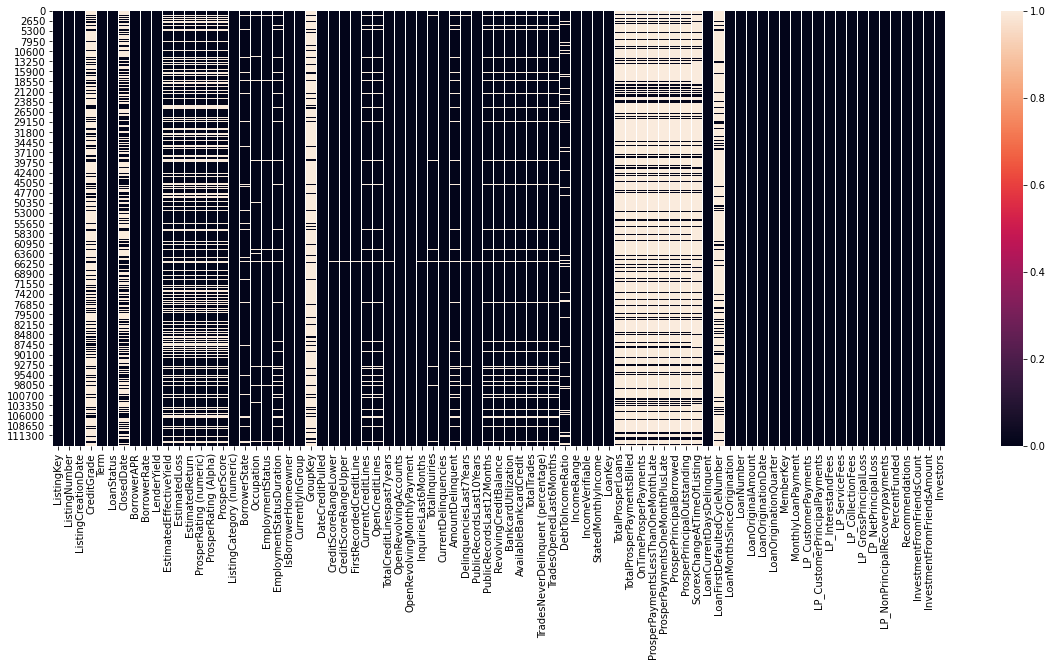

In [5]:
fig, ax = plt.subplots(figsize = (20,8))
ax = sns.heatmap(df.isnull(), vmin=0, vmax = 1)

### Checking for Duplicate Values

In [6]:
df[df.duplicated()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


The above result shows no duplicate value is present

### Renaming columns

In [7]:
df.rename(columns={'ListingCategory (numeric)' : 'ListingCategory_Numeric','ProsperRating (Alpha)': 'ProsperRating_Alpha', 'ProsperRating (numeric)': 'ProsperRating_Numeric','TradesNeverDelinquent (percentage)':'TradesNeverDelinquent_percentage'}, inplace=True)

In [8]:
# Selecting useful columns for my analysis
column = ['ListingNumber' ,'LoanStatus','EstimatedEffectiveYield' ,  'BorrowerAPR' , 'BorrowerRate' ,'ProsperRating_Numeric',
          'ProsperRating_Alpha','ProsperScore', 'EmploymentStatus','Occupation','EmploymentStatusDuration', 'IsBorrowerHomeowner',
          'IncomeVerifiable', 'StatedMonthlyIncome', 'MonthlyLoanPayment','Recommendations', 'DebtToIncomeRatio',
          'LoanOriginalAmount' ,'PercentFunded','IncomeRange', 'Investors','BorrowerState']

In [9]:
df_raw=df[column]
df_raw.head(3)

,ListingNumber,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating_Numeric,ProsperRating_Alpha,ProsperScore,EmploymentStatus,Occupation,...,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,Investors,BorrowerState
0,193129,Completed,NaN,0.16516,0.158,NaN,NaN,NaN,Self-employed,Other,...,True,3083.333333,330.43,0,0.17,9425,1.0,"$25,000-49,999",258,CO
1,1209647,Current,0.0796,0.12016,0.092,6.0,A,7.0,Employed,Professional,...,True,6125.000000,318.93,0,0.18,10000,1.0,"$50,000-74,999",1,CO
2,81716,Completed,NaN,0.28269,0.275,NaN,NaN,NaN,Not available,Other,...,True,2083.333333,123.32,0,0.06,3001,1.0,Not displayed,41,GA


### Removing data having null Values

In [10]:
loan=df_raw.dropna()

#### Testing:

In [11]:
loan.head()

,ListingNumber,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating_Numeric,ProsperRating_Alpha,ProsperScore,EmploymentStatus,Occupation,...,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,Investors,BorrowerState
1,1209647,Current,0.07960,0.12016,0.0920,6.0,A,7.0,Employed,Professional,...,True,6125.000000,318.93,0,0.18,10000,1.0,"$50,000-74,999",1,CO
3,658116,Current,0.08490,0.12528,0.0974,6.0,A,9.0,Employed,Skilled Labor,...,True,2875.000000,321.45,0,0.15,10000,1.0,"$25,000-49,999",158,GA
4,909464,Current,0.18316,0.24614,0.2085,3.0,D,4.0,Employed,Executive,...,True,9583.333333,563.97,0,0.26,15000,1.0,"$100,000+",20,MN
5,1074836,Current,0.11567,0.15425,0.1314,5.0,B,10.0,Employed,Professional,...,True,8333.333333,342.37,0,0.36,15000,1.0,"$100,000+",1,NM
6,750899,Current,0.23820,0.31032,0.2712,2.0,E,2.0,Employed,Sales - Retail,...,True,2083.333333,122.67,0,0.27,3000,1.0,"$25,000-49,999",1,KS


In [12]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ListingNumber             76216 non-null  int64  
 1   LoanStatus                76216 non-null  object 
 2   EstimatedEffectiveYield   76216 non-null  float64
 3   BorrowerAPR               76216 non-null  float64
 4   BorrowerRate              76216 non-null  float64
 5   ProsperRating_Numeric     76216 non-null  float64
 6   ProsperRating_Alpha       76216 non-null  object 
 7   ProsperScore              76216 non-null  float64
 8   EmploymentStatus          76216 non-null  object 
 9   Occupation                76216 non-null  object 
 10  EmploymentStatusDuration  76216 non-null  float64
 11  IsBorrowerHomeowner       76216 non-null  bool   
 12  IncomeVerifiable          76216 non-null  bool   
 13  StatedMonthlyIncome       76216 non-null  float64
 14  Month

In [13]:
loan.describe()

,ListingNumber,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating_Numeric,ProsperScore,EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,Investors
count,7.621600e+04,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000
mean,7.737463e+05,0.166738,0.223901,0.193621,4.132413,6.080246,104.578028,6002.833586,296.421859,0.016571,0.258032,9294.999410,0.998131,69.998517
std,2.344166e+05,0.067595,0.079372,0.074088,1.661460,2.360640,95.836443,5110.743506,189.674943,0.187732,0.320587,6413.404265,0.020572,97.801415
min,4.162750e+05,-0.181600,0.045830,0.040000,1.000000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1000.000000,0.700000,1.000000
25%,5.603650e+05,0.114800,0.161570,0.134900,3.000000,4.000000,32.000000,3583.333333,159.062500,0.000000,0.150000,4000.000000,1.000000,1.000000
50%,7.425500e+05,0.157670,0.215660,0.184500,4.000000,6.000000,76.000000,5041.666667,257.760000,0.000000,0.220000,8000.000000,1.000000,32.000000
75%,9.747142e+05,0.219000,0.287800,0.254900,5.000000,8.000000,150.000000,7250.000000,392.420000,0.000000,0.320000,14603.250000,1.000000,100.000000
max,1.255149e+06,0.319900,0.423950,0.360000,7.000000,11.000000,755.000000,483333.333333,2251.510000,19.000000,10.010000,35000.000000,1.012500,1189.000000


# Univariate Exploration

### Loan Status

In [14]:
loan.LoanStatus.value_counts()

Current                   51170
Completed                 17687
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        714
Past Due (31-60 days)       322
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

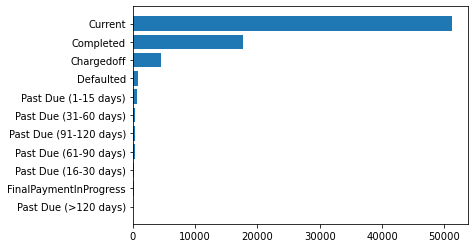

In [15]:
counts = loan["LoanStatus"].value_counts().sort_values()
plt.barh(counts.index, counts.values);

The above graph shows loan status of maximum people is "current". 

### Loan Amount


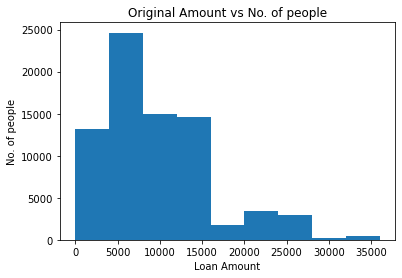

In [16]:
plt.hist(loan.LoanOriginalAmount,bins=np.arange(0,40000,4000))
plt.title("Original Amount vs No. of people")
plt.ylabel("No. of people")
plt.xlabel("Loan Amount");

The above graph shows Loan amount is usually between 0-15000. Maximum no. of people have loan amount in the range (approx) 4000-7500. 

### The Borrower's Annual Percentage Rate

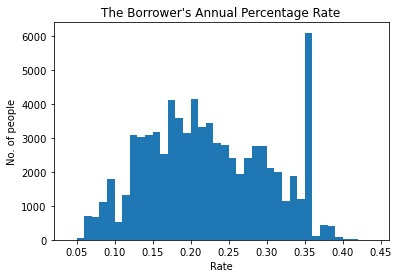

In [17]:
plt.hist(loan.BorrowerAPR,bins=np.arange(0.04,0.45,0.01))
plt.title("The Borrower's Annual Percentage Rate");
plt.ylabel("No. of people")
plt.xlabel("Rate");

The borrower percentage rate varies most commonly between 0.12 -036. 
The most common rate being 0.35-0.36.

### Borrower Debt / Income

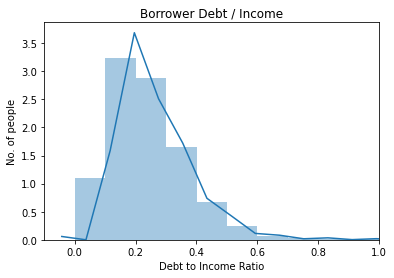

In [18]:
base_color = sns.color_palette()[1]
sns.distplot(loan.DebtToIncomeRatio, bins = 100)
plt.xlim(-0.1, 1)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('No. of people')
plt.title('Borrower Debt / Income');

Frequent value Borrower Debt to Income Ratio lies in 0.1-0.3

### The Borrower's interest rate       

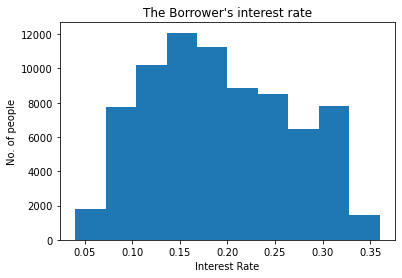

In [19]:
plt.hist(data = loan, x = 'BorrowerRate')
plt.xlabel('Interest Rate')
plt.ylabel('No. of people')
plt.title("The Borrower's interest rate");

The borrowers interest rate varies mostly between 0.7-0.32

### Prosper Score
 The score ranges from 1-10, with 10 being the best, or lowest risk score.

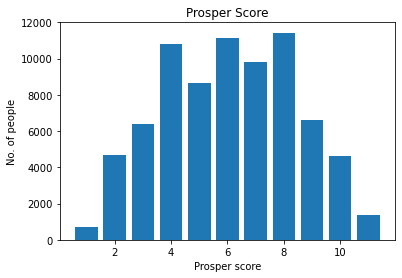

In [20]:
ax = plt.subplots()
counts = loan["ProsperScore"].value_counts().sort_values()
plt.bar(counts.index, counts.values)
plt.xlabel('Prosper score')
plt.ylabel('No. of people')
plt.title('Prosper Score');


The graph shows the borrowers are almost equally distributed, having both high as well as low risk borrowers.

### Prosper Rating Alpha 
(0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. )

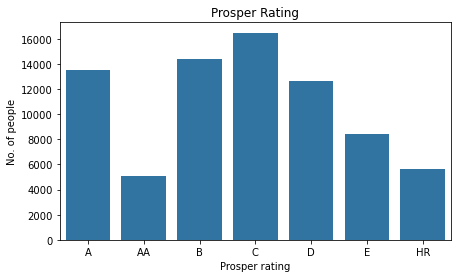

In [21]:
base_color = sns.color_palette()[0]
plt.figure(figsize=(7, 4))
sns.countplot(data=loan,x="ProsperRating_Alpha",order=["A","AA","B","C","D","E","HR"],color=base_color);
plt.xlabel('Prosper rating')
plt.ylabel('No. of people')
plt.title('Prosper Rating');

The common prosper ratings are C,B and A respectively which is quite good. But HR also has reasonable number which cannot be ignored 

### Prosper Rating (Numeric) 
(0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. )

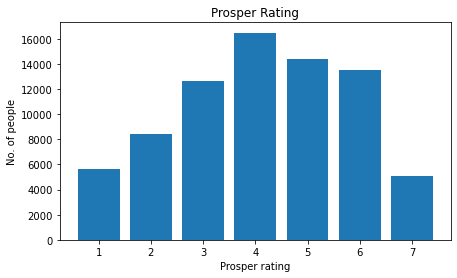

In [22]:
plt.figure(figsize=(7, 4))
counts = loan["ProsperRating_Numeric"].value_counts().sort_values()
plt.bar(counts.index, counts.values)
plt.xlabel('Prosper rating')
plt.ylabel('No. of people')
plt.title('Prosper Rating');

The most common prosper rating is 4. But even borrowers with rating 1 are present.

### Employment Status Of Borrower

In [23]:
loan.EmploymentStatus.value_counts()

Employed         65883
Full-time         7577
Other             2194
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

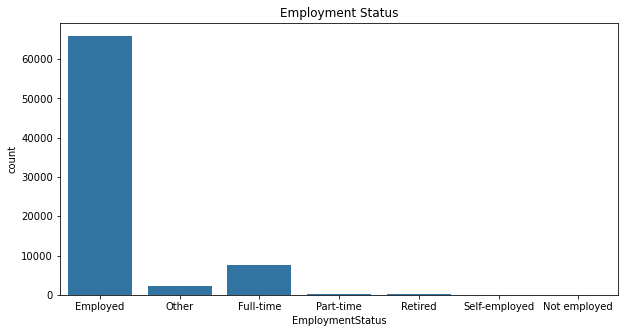

In [24]:
base_color = sns.color_palette()[0]
bars= ['Employed', 'Other', 'Full-time', 'Part-time', 'Retired',
       'Self-employed', 'Not employed']
x1, x2 = plt.subplots(figsize=(10,5))
sns.countplot(data = loan, x = "EmploymentStatus",order = bars,color=base_color)
x2.set_title("Employment Status");

Most of the people who took loans are employed.

### Homeowner?

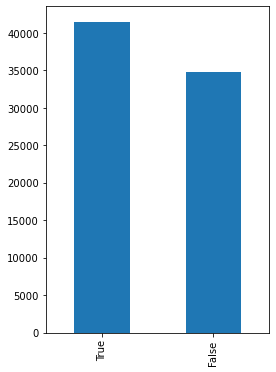

In [25]:
loan['IsBorrowerHomeowner'].value_counts().plot(kind='bar', figsize=[4,6],);

More people are houseowners.

### Income of borrower

In [26]:
loan.IncomeRange.value_counts()

$50,000-74,999    23692
$25,000-49,999    21421
$100,000+         13977
$75,000-99,999    13547
$1-24,999          3578
Not employed          1
Name: IncomeRange, dtype: int64

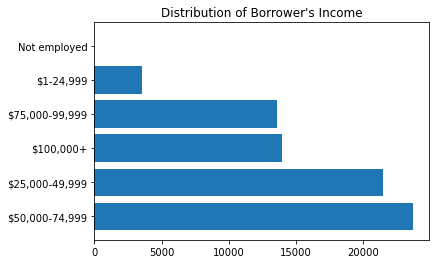

In [27]:
counts = loan["IncomeRange"].value_counts()
plt.barh(counts.index, counts.values)
plt.title("Distribution of Borrower's Income");

Most of the borrowers have income in the range 50,000-74,999 and 25,000-49,999 respectively

### Monthly Income

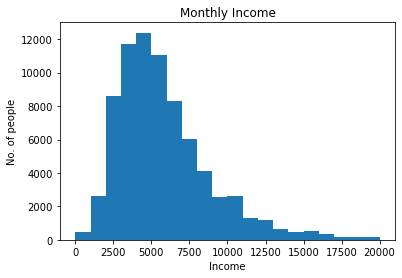

In [28]:
loan_sub = loan[loan['StatedMonthlyIncome'] <= 20000]
bin_edges = np.arange(0, loan_sub['StatedMonthlyIncome'].max()+1000, 1000)
plt.hist(data =loan_sub, x = 'StatedMonthlyIncome', bins = bin_edges)
plt.xlabel('Income')
plt.ylabel('No. of people')
plt.title('Monthly Income');

Monthly Income is right skewed.
The common range is 1000-7000 approximately.

### Monthly Loan Payment

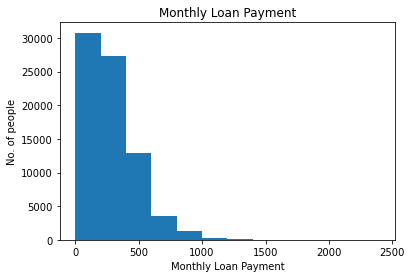

In [29]:
bin_edges = np.arange(0, loan['MonthlyLoanPayment'].max()+200, 200)
plt.hist(data =loan,x = 'MonthlyLoanPayment',bins = bin_edges)
plt.xlabel('Monthly Loan Payment')
plt.ylabel('No. of people');
plt.title("Monthly Loan Payment");

Monthly loan payment is right skewed,common range lies in 0-400.


<ul> <h2>Summary:</h2>
    <li> Loan status of maximum people is "current".</li>
    <li> Loan amount is usually between 0-15000. Maximum no. of people have loan amount in the range (approx) 4000-7500.</li>
    <li> The borrower percentage rate varies most commonly between 0.12 -036. The most common rate being 0.35-0.36.</li>
    <li> Frequent value Borrower Debt to Income Ratio lies in 0.1-0.3.</li>
    <li> The borrowers interest rate varies mostly between 0.7-0.32</li>
    <li> The borrowers are almost equally distributed, having both high as well as low risk borrowers.</li>
    <li> The common prosper ratings are C,B and A respectively which is quite good. But HR also has reasonable number which cannot be ignored</li>
    <li>The most common prosper rating is 4. But even borrowers with rating 1 are present.</li>
    <li>Most of the people who took loans are employed.</li>
    <li>More people are houseowners.</li>
    <li>Most of the borrowers have income in the range 50,000-74,999 and 25,000-49,999 respectively</li>
    <li>Monthly Income is right skewed. The common range is 1000-7000 approximately.</li>
    <li>Monthly loan payment is right skewed,common range lies in 0-400.</li>
</ul>

# Bivariate Exploration

### Prosper Score and Loan Amount

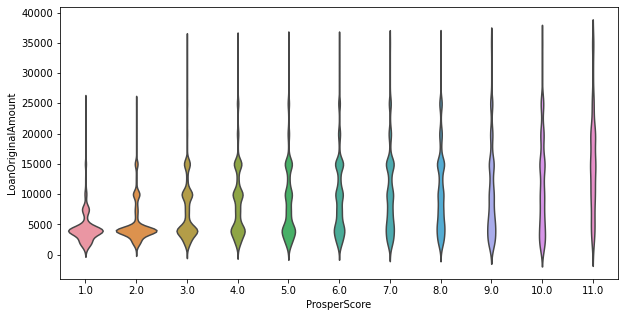

In [30]:
plt.figure(figsize=[10,5])
sns.violinplot(data=loan, x='ProsperScore', y='LoanOriginalAmount',inner= None);

### Loan status and borrower APR

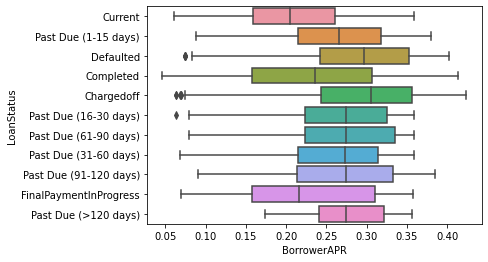

In [31]:
sns.boxplot(data = loan, y='LoanStatus',x = 'BorrowerAPR');

### Correlation between important numeric variables

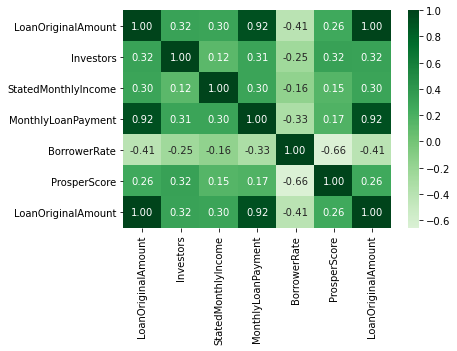

In [32]:
x=['LoanOriginalAmount', 'Investors','StatedMonthlyIncome', 'MonthlyLoanPayment', 'BorrowerRate', 'ProsperScore','LoanOriginalAmount']
sns.heatmap(loan[x].corr(), annot = True, fmt = '.2f',cmap = "Greens", center = 0);

The figure shows correlation between different important factors.Postitive correlation is between Loanoriginalamount and monthlyloanpayment.Negative correaltion is between borrowerrate and loanoriginalamount, borrowerrate and prosper score

### Borrower Interest Rate vs Prosper score

In [33]:
loan[["ProsperScore","BorrowerRate"]].corr()

,ProsperScore,BorrowerRate
ProsperScore,1.00000,-0.65832
BorrowerRate,-0.65832,1.00000


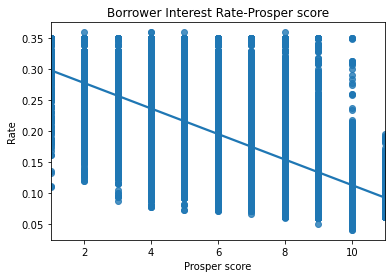

In [34]:
sns.regplot(data = loan, x = 'ProsperScore', y ='BorrowerRate')
plt.xlabel('Prosper score')
plt.ylabel('Rate')
plt.title('Borrower Interest Rate-Prosper score');

The figure clearly shows that Borrower Interest Rate and Prosper score are inversely related to each other

### Loan Amount vs Borrower Interest Rate

In [35]:
loan[["LoanOriginalAmount","BorrowerRate"]].corr()

,LoanOriginalAmount,BorrowerRate
LoanOriginalAmount,1.00000,-0.40686
BorrowerRate,-0.40686,1.00000


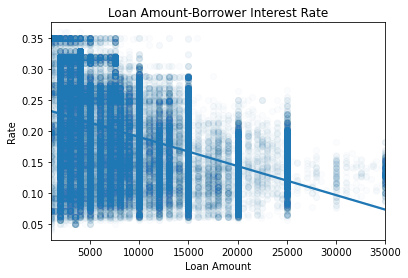

In [36]:
sns.regplot(data = loan, x = 'LoanOriginalAmount', y ="BorrowerRate",scatter_kws = {'alpha' : 1/50})
plt.xlabel('Loan Amount')
plt.ylabel('Rate')
plt.title('Loan Amount-Borrower Interest Rate');

The figure clearly shows Loan Amount and Borrower Interest Rate are negatively correlated.

### ProsperScore and Employment Status

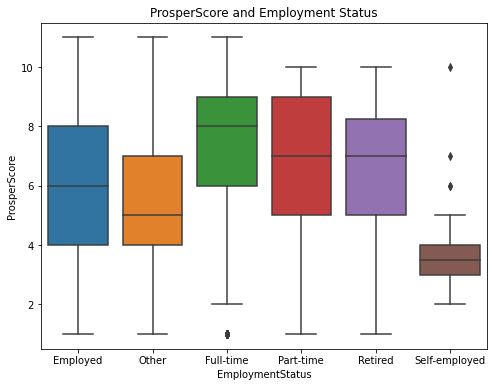

In [37]:
loan_df= loan[loan['IncomeRange'] != 'Not employed']
plt.figure(figsize = [8, 6])
sns.boxplot(data = loan_df, x = 'EmploymentStatus', y = 'ProsperScore');
plt.title('ProsperScore and Employment Status');

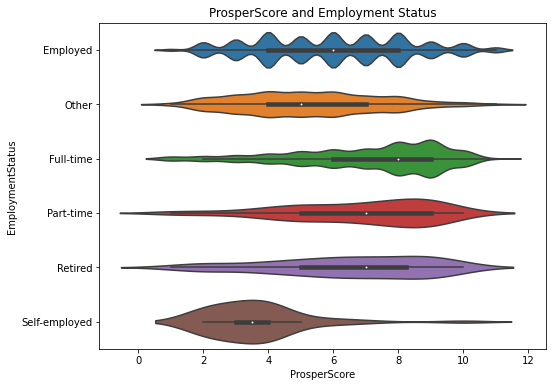

In [68]:
plt.figure(figsize = [8, 6])
sns.violinplot(data = loan_df, y = 'EmploymentStatus', x = 'ProsperScore')
plt.title('ProsperScore and Employment Status');

Self employed have least prosper rating with some outliners present. Full time, part time and retired have high prosper rating.

### Prosper Score and Income

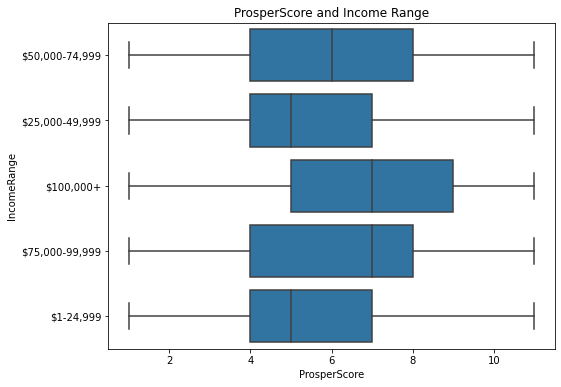

In [69]:
plt.figure(figsize = [8, 6])
base_color = sns.color_palette()[0]
sns.boxplot(data = loan_df, x = 'ProsperScore', y = 'IncomeRange', color = base_color);
plt.title('ProsperScore and Income Range');

People with income range 75,000-99,999 and 100,000+ have high prosper score.
75,000-99,999 : q2:7 and q3:8
100,000 : q2:7 and q3:9

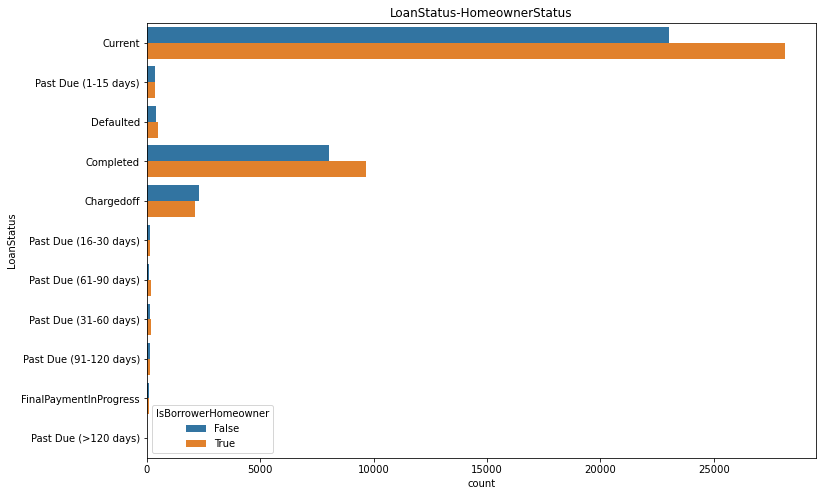

In [40]:
plt.figure(figsize = [12, 8])
sns.countplot(data = loan, y = 'LoanStatus', hue = 'IsBorrowerHomeowner')
plt.title('LoanStatus-HomeownerStatus');

## Summary:

<li>Postitive correlation is between Loanoriginalamount and monthlyloanpayment.Negative correaltion is between borrowerrate and loanoriginalamount, borrowerrate and prosper score.
    </li>
<li>Borrower Interest Rate and Prosper score are inversely related to each other.Borrowers with high prosper score get loan at lower annual percentage rate</li>
<li>Loan Amount and Borrower Interest Rate are negatively correlated.Also loans of lesser amount is given at low annual percentage rate. </li>
<li>Self employed have least prosper rating with some outliners present. Full time, part time and retired have high prosper rating. So full time employees get loan at a lesser rate as compared to others.Self-employed have to pay a high annual rate.Also full time employees gets loan easily whereas self-employed do not get loan easily.</li>
<li>Prosper score affects the loan original amount.People with less prosper score have lesser loan amount than people with higher prosper score. Therefore it's easier to get high amount loan with higher prosper score</li>
<li>People with income range 75,000-99,999 and 100,000+ have high prosper score.
People with income > 75,000 get loan easily. </li>
<li>Therefore people with higher income have higher prosper score and thereby they get high amount loans at a lower borrowerAPR.



# Multivariable Exploration

###   Relation between LoanStatus-Loan Amount-Income Range

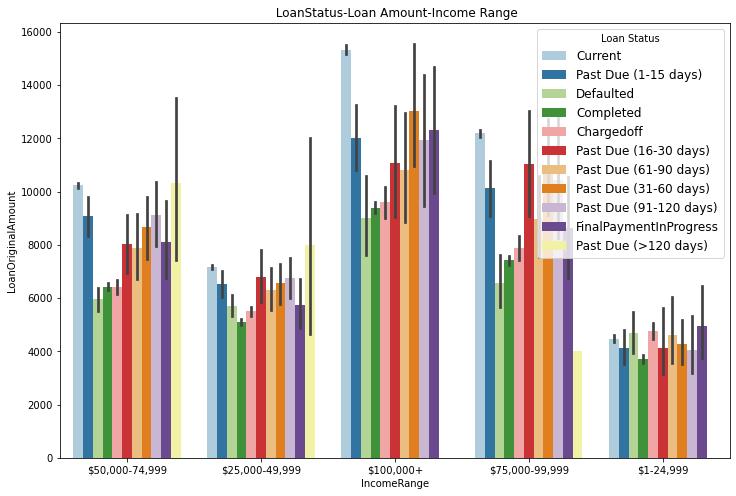

In [60]:
plt.figure(figsize = [12, 8])
x = sns.barplot(data = loan_df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'LoanStatus',palette="Paired")
x.legend(loc=0, fontsize = 12, title = 'Loan Status')
plt.title(' LoanStatus-Loan Amount-Income Range');

### Relation between Borrow Rate,BorrowerAPR and Prosper Rating

c:\users\mridu\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


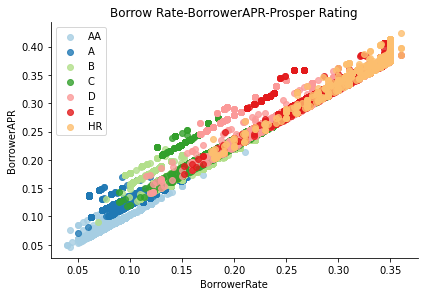

In [42]:
x = sns.FacetGrid(data = loan, hue = 'ProsperRating_Alpha', hue_order = ['AA','A','B','C','D','E','HR'], size = 4, aspect = 1.5, palette="Paired")
x.map(sns.regplot,"BorrowerRate","BorrowerAPR", fit_reg = False);
plt.legend(fontsize = 10)
plt.title("Borrow Rate-BorrowerAPR-Prosper Rating");

In [43]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76215 entries, 1 to 113936
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ListingNumber             76215 non-null  int64  
 1   LoanStatus                76215 non-null  object 
 2   EstimatedEffectiveYield   76215 non-null  float64
 3   BorrowerAPR               76215 non-null  float64
 4   BorrowerRate              76215 non-null  float64
 5   ProsperRating_Numeric     76215 non-null  float64
 6   ProsperRating_Alpha       76215 non-null  object 
 7   ProsperScore              76215 non-null  float64
 8   EmploymentStatus          76215 non-null  object 
 9   Occupation                76215 non-null  object 
 10  EmploymentStatusDuration  76215 non-null  float64
 11  IsBorrowerHomeowner       76215 non-null  bool   
 12  IncomeVerifiable          76215 non-null  bool   
 13  StatedMonthlyIncome       76215 non-null  float64
 14  Month

High prosper rating has lesser Borrower rate and lesser borrower APR

### Relation between ProsperRating_Alpha,Loan Amount and Income Range

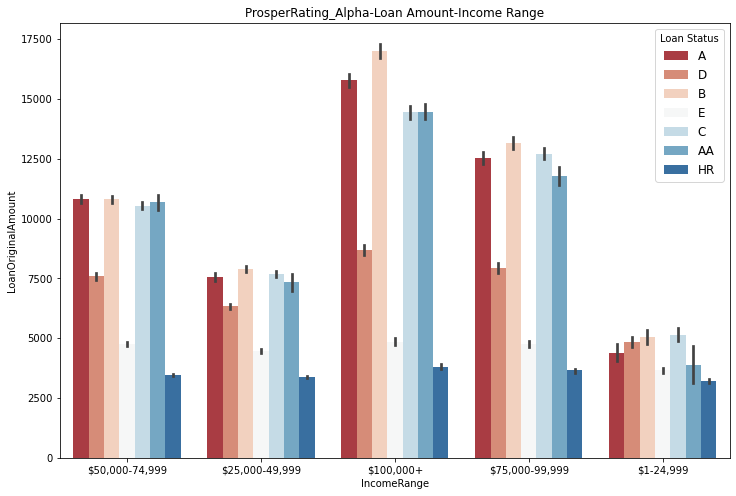

In [59]:
plt.figure(figsize = [12, 8])
x = sns.barplot(data = loan_df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'ProsperRating_Alpha',palette="RdBu")
x.legend(loc=0, fontsize = 12, title = 'Loan Status')
plt.title('ProsperRating_Alpha-Loan Amount-Income Range');

Income range 1-24,999 has large number of prosper rating as HR compared to the total borrowers in that range.

### Relation between EmploymentStatus_Alpha,Loan Amount and Income Range

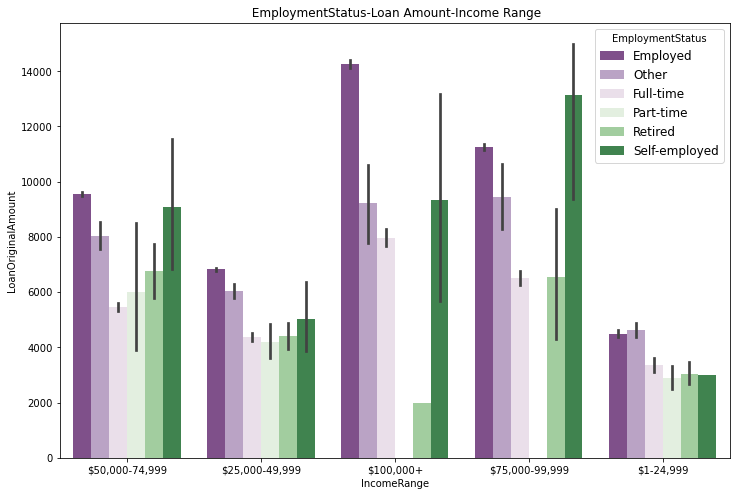

In [64]:
plt.figure(figsize = [12 ,8])
x = sns.barplot(data = loan_df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',palette="PRGn")
x.legend(loc=0, fontsize = 12, title = 'EmploymentStatus')
plt.title(' EmploymentStatus-Loan Amount-Income Range');

Employees with status 'Employed' and 'self-employed' take loans of larger amount.
Employess with less income take loans of lesser total amount(Around 3000-5000)

## Summary: 
<ul>
<li>High prosper rating has lesser Borrower rate and lesser borrower APR.So borrowers with high prosper rating get loans at a lesser rate and borrowerAPR</li>
<li>Income range 100,000 + take loans with high original amount and have most common loan status as current.</li>
<li>Income range 1-24,9999 takes low amount loans.Income Range 50,000-74,999 have most number of past due(>120 days) as status.Income range 1-24,999 has large number of prosper rating as HR compared to the total borrowers in that range.So employees having income in this range have lesser chance of getting loans of high amount.</li>
    
<li>Employees with status 'Employed' and 'self-employed' take loans of larger amount.
Employess with less income take loans of lesser total amount(Around 3000-5000)</li>
    </ul>